In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

sns.set_style("ticks")
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv("data/cleaned_final_data.csv") # OR USE searchData/limitData
df = df.drop_duplicates()
print(df.dtypes)
df.sample(frac=1).head(5)

year                       int64
month                      int64
region                    object
town                      object
block                     object
street_name               object
lease_commence_date        int64
month_remaining_lease      int64
flat_type                 object
flat_model                 int64
floor_area_sqm           float64
storey_range_low           int64
storey_range_high          int64
nearest_mrt               object
min_dist_mrt             float64
nearest_mall              object
min_dist_mall            float64
min_dist_town_in_km      float64
total_population         float64
cpi                      float64
psi                        int64
resale_price             float64
dtype: object


,year,month,region,town,block,street_name,lease_commence_date,month_remaining_lease,flat_type,flat_model,...,storey_range_high,nearest_mrt,min_dist_mrt,nearest_mall,min_dist_mall,min_dist_town_in_km,total_population,cpi,psi,resale_price
54280,2019,7,north,YISHUN,443,YISHUN AVENUE 11,2012,1112,4 ROOM,8,...,6,YISHUN MRT STATION,1.283653,Wisteria Mall,0.764196,14.496613,1.716009,99.587,52,355000.0
83674,2020,11,east,KALLANG/WHAMPOA,15,FARRER PARK ROAD,2004,992,3 ROOM,8,...,18,FARRER PARK MRT STATION,0.329473,Mustafa Shopping Centre,0.375733,2.005313,1.703850,100.105,48,470000.0
11467,2017,8,central,ANG MO KIO,435,ANG MO KIO AVENUE 10,1979,727,3 ROOM,12,...,6,ANG MO KIO MRT STATION,0.568827,AMK Hub,0.658099,8.269663,1.653498,99.056,36,358000.0
57460,2019,9,north,SENGKANG,281A,SENGKANG EAST AVENUE,2015,1139,3 ROOM,13,...,12,RENJONG LRT STATION,0.145439,Compass One,0.769106,11.176038,1.716009,100.147,58,389888.0
51213,2019,6,west,JURONG WEST,823,JURONG WEST STREET 81,1990,839,5 ROOM,5,...,12,PIONEER MRT STATION,1.069049,Gek Poh Shopping Centre,0.447158,18.597489,1.716009,100.038,47,352000.0


In [4]:
cols_to_norm = [
    'month_remaining_lease', 'floor_area_sqm',
    'storey_range_low', 'storey_range_high',
    'min_dist_mrt', 'min_dist_mall', 'min_dist_town_in_km', 'total_population', 'resale_price']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df.head(5)


,year,month,region,town,block,street_name,lease_commence_date,month_remaining_lease,flat_type,flat_model,...,storey_range_high,nearest_mrt,min_dist_mrt,nearest_mall,min_dist_mall,min_dist_town_in_km,total_population,cpi,psi,resale_price
0,2017,1,central,ANG MO KIO,406,ANG MO KIO AVENUE 10,1979,0.334855,2 ROOM,5,...,0.1875,BISHAN DEPOT,0.257462,AMK Hub,0.311318,0.385026,0.63474,99.026,29,0.071987
1,2017,1,central,ANG MO KIO,108,ANG MO KIO AVENUE 4,1978,0.321157,3 ROOM,12,...,0.0000,MAYFLOWER MRT STATION,0.046331,Broadway Plaza,0.277670,0.444717,0.63474,99.026,29,0.086072
2,2017,1,central,ANG MO KIO,602,ANG MO KIO AVENUE 5,1980,0.354642,3 ROOM,12,...,0.0000,LENTOR MRT STATION,0.131016,Broadway Plaza,0.474936,0.503145,0.63474,99.026,29,0.095462
3,2017,1,central,ANG MO KIO,465,ANG MO KIO AVENUE 10,1980,0.348554,3 ROOM,12,...,0.0625,ANG MO KIO MRT STATION,0.261477,myVillage At Serangoon Garden,0.277530,0.410110,0.63474,99.026,29,0.097809
4,2017,1,central,ANG MO KIO,601,ANG MO KIO AVENUE 5,1980,0.354642,3 ROOM,12,...,0.0000,LENTOR MRT STATION,0.122820,Broadway Plaza,0.488574,0.505303,0.63474,99.026,29,0.097809


/var/folders/dh/hgl_kbnx491bp562snpkpz3r0000gn/T/ipykernel_38940/2949251381.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
/var/folders/dh/hgl_kbnx491bp562snpkpz3r0000gn/T/ipykernel_38940/2949251381.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  svm = sns.heatmap(df.corr())


                           year     month  lease_commence_date  \
year                   1.000000 -0.109528             0.124814   
month                 -0.109528  1.000000             0.009307   
lease_commence_date    0.124814  0.009307             1.000000   
month_remaining_lease  0.000132  0.002777             0.991769   
flat_model            -0.012993 -0.008086            -0.119049   
floor_area_sqm        -0.014882  0.004697             0.135443   
storey_range_low       0.019966 -0.003247             0.279048   
storey_range_high      0.019966 -0.003247             0.279048   
min_dist_mrt          -0.007204 -0.001518            -0.157125   
min_dist_mall         -0.002928 -0.006006            -0.250935   
min_dist_town_in_km   -0.004003  0.003347             0.295062   
total_population      -0.269021  0.016775            -0.051496   
cpi                    0.809193  0.020610             0.087124   
psi                   -0.222901 -0.019832            -0.022849   
resale_pri

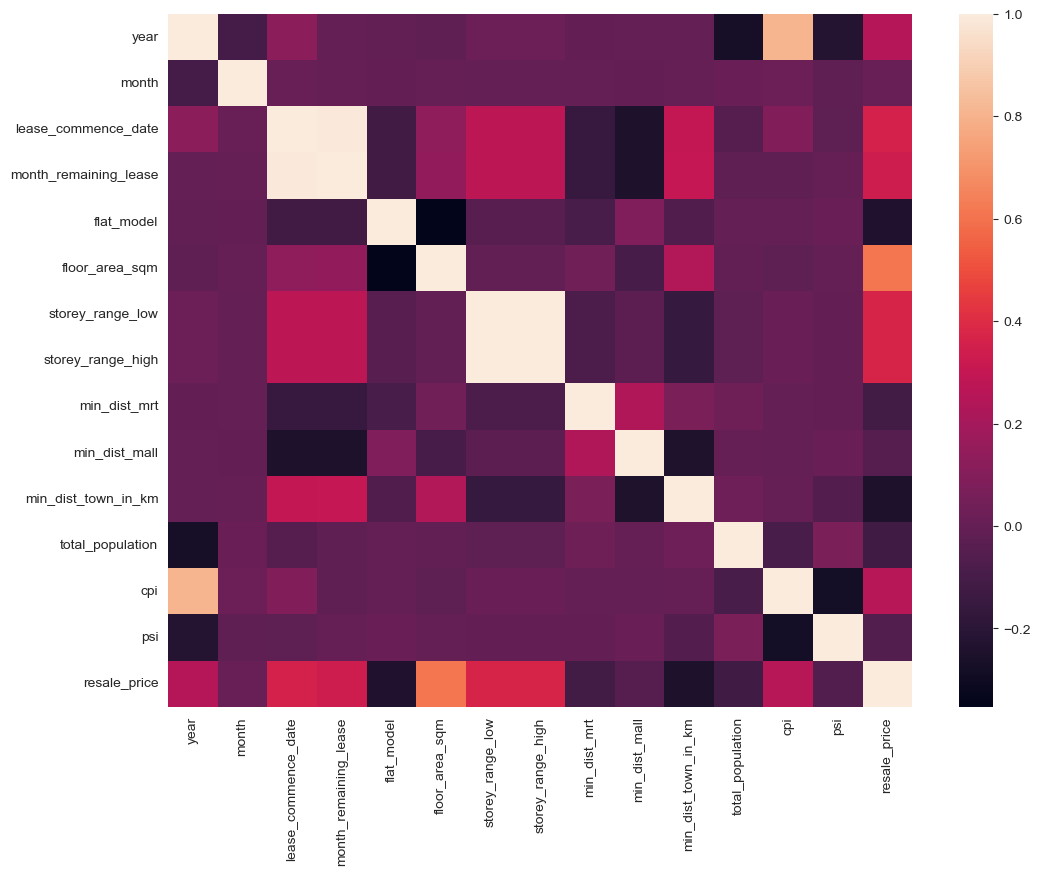

In [18]:
# Compute the correlation matrix
corr = df.corr()
print(corr)

f, ax = plt.subplots(figsize=(12, 9))
svm = sns.heatmap(df.corr())

figure = svm.get_figure()    
figure.savefig('images/svm_conf.png', bbox_inches="tight")

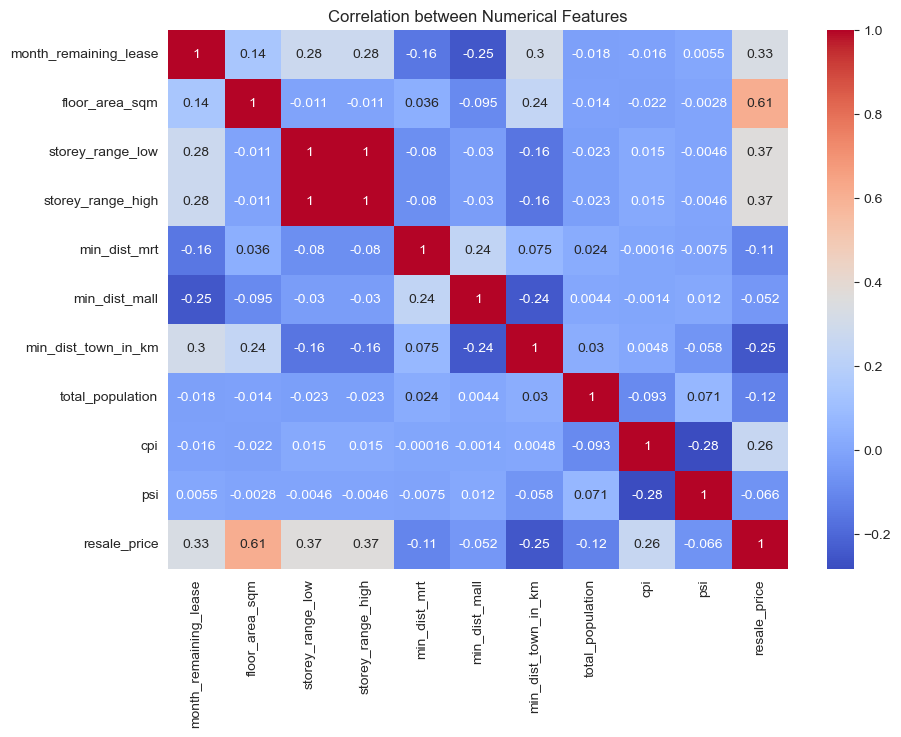

In [25]:
num_col = [
    'month_remaining_lease', 'floor_area_sqm',
    'storey_range_low', 'storey_range_high',
    'min_dist_mrt', 'min_dist_mall', 'min_dist_town_in_km', 'total_population', 'cpi', 'psi', 'resale_price']

f, ax = plt.subplots(figsize=(10, 7))
corr = df[num_col].corr()
svm = sns.heatmap(corr, annot=True, cmap='coolwarm')
figure = svm.get_figure()    
figure.savefig('images/num_svm_conf.png', bbox_inches="tight")
plt.title('Correlation between Numerical Features')
plt.show()